In [26]:

# open .pt file containing an array
import torch
import numpy as np

# load the model
real_images = torch.load('/mnt/d/projects/cardiac_gan/results/2024-03-10_01-24-33/2024-03-10_01-24-33_real.pt')
syn_images = torch.load('/mnt/d/projects/cardiac_gan/results/2024-03-10_01-24-33/2024-03-10_01-24-33_syn.pt')

print(real_images.shape)
print(syn_images.shape)

# convert images to single channel
real_images = real_images[:, 0, :, :]
syn_images = syn_images[:, 0, :, :]

real_images = (real_images + 1) / 2 

# load the png images from the same folder in order
import os
import cv2

masks_path = '/mnt/d/projects/cardiac_gan/results/2024-03-10_01-24-33/labels_visible'
masks = []
for i in range(len(real_images)):
    file_name = f'{i:02d}.png'
    print(file_name)
    mask = cv2.imread(os.path.join(masks_path, file_name), cv2.IMREAD_GRAYSCALE)
    masks.append(mask)

torch.Size([610, 3, 256, 256])
torch.Size([610, 3, 256, 256])
00.png
01.png
02.png
03.png
04.png
05.png
06.png
07.png
08.png
09.png
10.png
11.png
12.png
13.png
14.png
15.png
16.png
17.png
18.png
19.png
20.png
21.png
22.png
23.png
24.png
25.png
26.png
27.png
28.png
29.png
30.png
31.png
32.png
33.png
34.png
35.png
36.png
37.png
38.png
39.png
40.png
41.png
42.png
43.png
44.png
45.png
46.png
47.png
48.png
49.png
50.png
51.png
52.png
53.png
54.png
55.png
56.png
57.png
58.png
59.png
60.png
61.png
62.png
63.png
64.png
65.png
66.png
67.png
68.png
69.png
70.png
71.png
72.png
73.png
74.png
75.png
76.png
77.png
78.png
79.png
80.png
81.png
82.png
83.png
84.png
85.png
86.png
87.png
88.png
89.png
90.png
91.png
92.png
93.png
94.png
95.png
96.png
97.png
98.png
99.png
100.png
101.png
102.png
103.png
104.png
105.png
106.png
107.png
108.png
109.png
110.png
111.png
112.png
113.png
114.png
115.png
116.png
117.png
118.png
119.png
120.png
121.png
122.png
123.png
124.png
125.png
126.png
127.png
128.png
129.pn

In [29]:
print(real_images[0].shape)

torch.Size([256, 256])


In [41]:
average_wall_real_T1 = []
average_venticle_real_T1 = []
average_wall_syn_T1 = []
average_venticle_syn_T1 = []

average_wall_real_T2 = []
average_venticle_real_T2 = []
average_wall_syn_T2 = []
average_venticle_syn_T2 = []


for i, mask in enumerate(masks):
    print(i)
    venticle_val = np.max(mask)
    #print(venticle_val)
    wall_val = np.unique(mask)[1] if len(np.unique(mask)) > 2 else -1
    venticle_mask = mask == venticle_val
    wall_mask = mask == wall_val
    
    # calculate the average intensity of the venticle and wall on real and synthetic images
    venticle_intensity_real = torch.mean(real_images[i][venticle_mask])
    wall_intensity_real = torch.mean(real_images[i][wall_mask])

    venticle_intensity_syn = torch.mean(syn_images[i][venticle_mask])
    wall_intensity_syn = torch.mean(syn_images[i][wall_mask])

    #print(f'Venticle real: {venticle_intensity_real}, wall real: {wall_intensity_real}')
    #print(f'Venticle syn: {venticle_intensity_syn}, wall syn: {wall_intensity_syn}')
    if venticle_val == 85:
        average_venticle_real_T1.append(venticle_intensity_real)
        average_venticle_syn_T1.append(venticle_intensity_syn)
        average_wall_real_T1.append(wall_intensity_real)
        average_wall_syn_T1.append(wall_intensity_syn)
    elif venticle_val == 213:
        average_venticle_real_T2.append(venticle_intensity_real)
        average_venticle_syn_T2.append(venticle_intensity_syn)
        average_wall_real_T2.append(wall_intensity_real)
        average_wall_syn_T2.append(wall_intensity_syn)
    
    



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

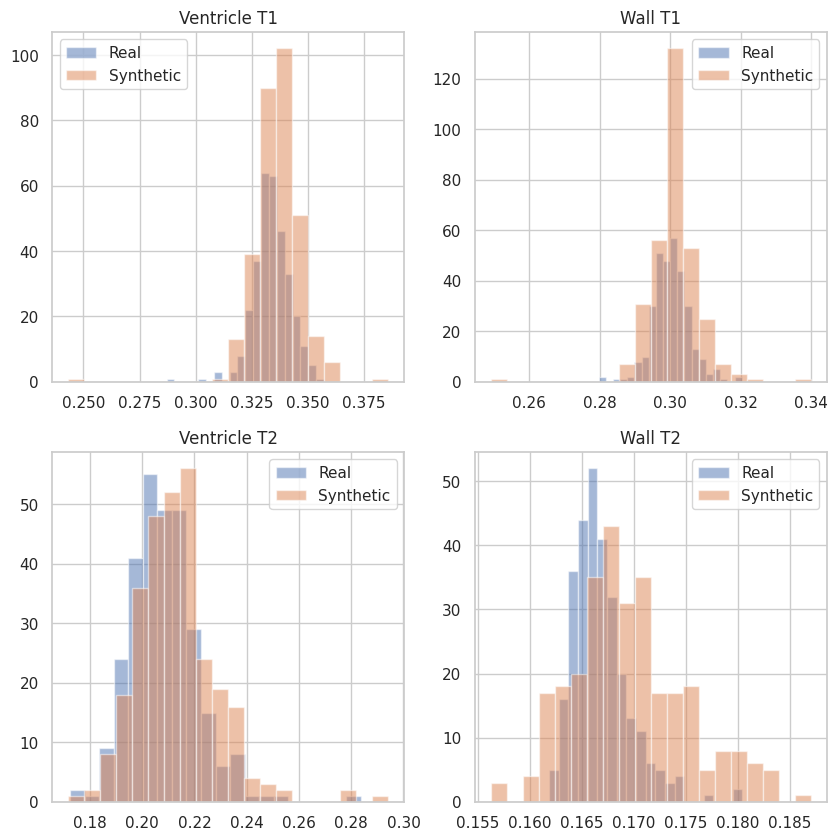

In [46]:
# viusalize the results
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].hist(average_venticle_real_T1, bins=20, alpha=0.5, label='Real')
ax[0, 0].hist(average_venticle_syn_T1, bins=20, alpha=0.5, label='Synthetic')
ax[0, 0].set_title('Ventricle T1')
ax[0, 0].legend()

ax[0, 1].hist(average_wall_real_T1, bins=20, alpha=0.5, label='Real')
ax[0, 1].hist(average_wall_syn_T1, bins=20, alpha=0.5, label='Synthetic')
ax[0, 1].set_title('Wall T1')
ax[0, 1].legend()

ax[1, 0].hist(average_venticle_real_T2, bins=20, alpha=0.5, label='Real')
ax[1, 0].hist(average_venticle_syn_T2, bins=20, alpha=0.5, label='Synthetic')
ax[1, 0].set_title('Ventricle T2')
ax[1, 0].legend()

ax[1, 1].hist(average_wall_real_T2, bins=20, alpha=0.5, label='Real')
ax[1, 1].hist(average_wall_syn_T2, bins=20, alpha=0.5, label='Synthetic')
ax[1, 1].set_title('Wall T2')
ax[1, 1].legend()

plt.show()







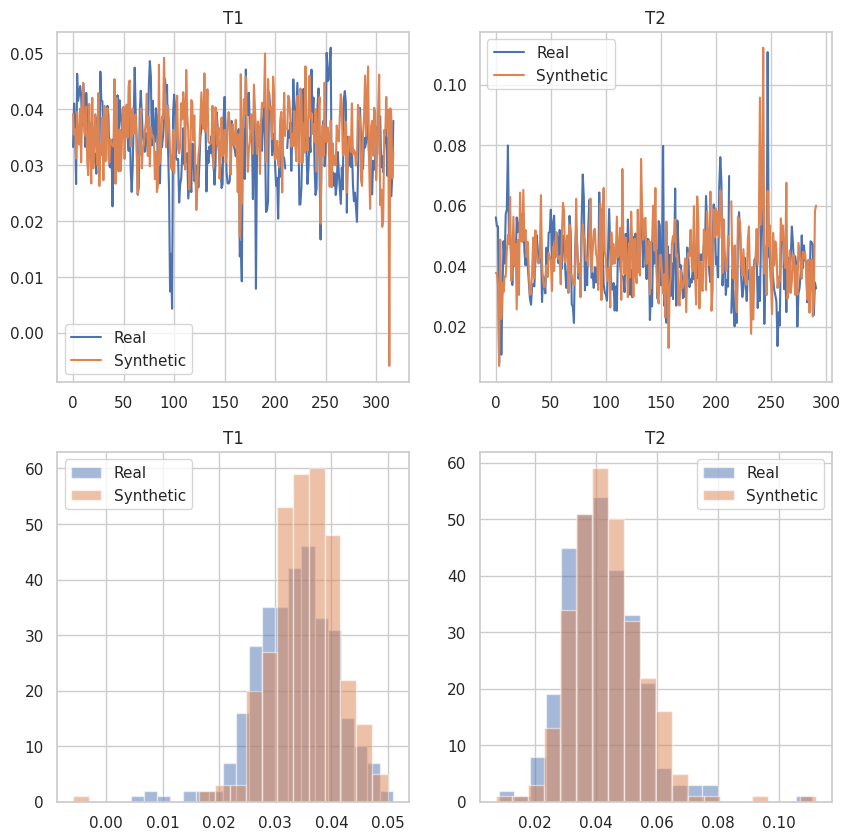

T1 Real: 0.03342767432332039, 0.007097096648067236
T1 Synthetic: 0.03526942431926727, 0.006113062612712383
T2 Real: 0.041673727333545685, 0.011998876929283142
T2 Synthetic: 0.043526533991098404, 0.011819382198154926


In [57]:
# plot wall and venticle intensity difference per image
diff_T1_real = [a - b for a, b in zip(average_venticle_real_T1, average_wall_real_T1)]
diff_T1_syn = [a - b for a, b in zip(average_venticle_syn_T1, average_wall_syn_T1)]
diff_T2_real = [a - b for a, b in zip(average_venticle_real_T2, average_wall_real_T2)]
diff_T2_syn = [a - b for a, b in zip(average_venticle_syn_T2, average_wall_syn_T2)]

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].plot(diff_T1_real, label='Real')
ax[0, 0].plot(diff_T1_syn, label='Synthetic')
ax[0, 0].set_title('T1')
ax[0, 0].legend()

ax[0, 1].plot(diff_T2_real, label='Real')
ax[0, 1].plot(diff_T2_syn, label='Synthetic')
ax[0, 1].set_title('T2')
ax[0, 1].legend()

ax[1, 0].hist(diff_T1_real, bins=20, alpha=0.5, label='Real')
ax[1, 0].hist(diff_T1_syn, bins=20, alpha=0.5, label='Synthetic')
ax[1, 0].set_title('T1')
ax[1, 0].legend()

ax[1, 1].hist(diff_T2_real, bins=20, alpha=0.5, label='Real')
ax[1, 1].hist(diff_T2_syn, bins=20, alpha=0.5, label='Synthetic')
ax[1, 1].set_title('T2')
ax[1, 1].legend()

plt.show()

# convert the lists to numpy arrays
diff_T1_real = np.array(diff_T1_real)
diff_T1_syn = np.array(diff_T1_syn)
diff_T2_real = np.array(diff_T2_real)
diff_T2_syn = np.array(diff_T2_syn)

# print the average difference and std
print(f'T1 Real: {np.nanmean(diff_T1_real)}, {np.nanstd(diff_T1_real)}')
print(f'T1 Synthetic: {np.nanmean(diff_T1_syn)}, {np.nanstd(diff_T1_syn)}')
print(f'T2 Real: {np.nanmean(diff_T2_real)}, {np.nanstd(diff_T2_real)}')
print(f'T2 Synthetic: {np.nanmean(diff_T2_syn)}, {np.nanstd(diff_T2_syn)}')





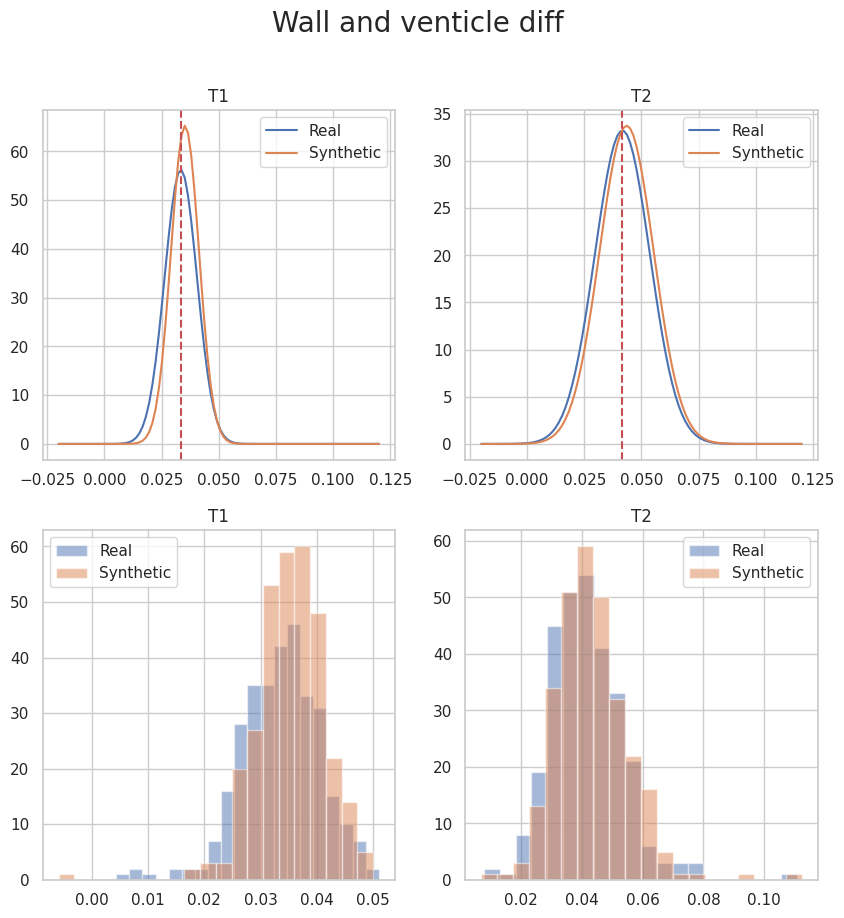

In [91]:
# visualize the distribution of the difference from mean and std as gaussian
import scipy.stats as stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Wall and venticle diff', fontsize=20)
x = np.linspace(-0.02, 0.12, 100)
ax[0, 0].plot(x, stats.norm.pdf(x, np.nanmean(diff_T1_real), np.nanstd(diff_T1_real)), label='Real')
ax[0, 0].plot(x, stats.norm.pdf(x, np.nanmean(diff_T1_syn), np.nanstd(diff_T1_syn)), label='Synthetic')
# draw the mean with a vertical line
ax[0, 0].axvline(np.nanmean(diff_T1_real), color='r', linestyle='--')
ax[0, 0].set_title('T1')
ax[0, 0].legend()

ax[0, 1].plot(x, stats.norm.pdf(x, np.nanmean(diff_T2_real), np.nanstd(diff_T2_real)), label='Real')
ax[0, 1].plot(x, stats.norm.pdf(x, np.nanmean(diff_T2_syn), np.nanstd(diff_T2_syn)), label='Synthetic')
# draw the mean with a vertical line
ax[0, 1].axvline(np.nanmean(diff_T2_real), color='r', linestyle='--')
ax[0, 1].set_title('T2')
ax[0, 1].legend()

ax[1, 0].hist(diff_T1_real, bins=20, alpha=0.5, label='Real')
ax[1, 0].hist(diff_T1_syn, bins=20, alpha=0.5, label='Synthetic')
ax[1, 0].set_title('T1')
ax[1, 0].legend()

ax[1, 1].hist(diff_T2_real, bins=20, alpha=0.5, label='Real')
ax[1, 1].hist(diff_T2_syn, bins=20, alpha=0.5, label='Synthetic')
ax[1, 1].set_title('T2')
ax[1, 1].legend()

plt.show()



In [88]:
import torch as th

nan = float('nan')

data = {}
data['label'] = [[0, 1, 2],
                 [1, 2, 0],
                 [2, 0, 3],]

data['label'] = th.tensor(data['label'])
data['label'] = data['label'].long()

# create one-hot label map
label_map = data['label']
label_map = label_map[None, None, ...]
bs = 1
h = 3
w = 3
nc = 4
#nc = self.num_classes
input_label = th.FloatTensor(bs, nc, h, w).zero_()
input_semantics = input_label.scatter_(1, label_map, 1.0, )
print(input_semantics)
print(input_semantics[:, 1:, ...])




tensor([[[[1., 0., 0.],
          [0., 0., 1.],
          [0., 1., 0.]],

         [[0., 1., 0.],
          [1., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 1.],
          [0., 1., 0.],
          [1., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 1.]]]])
tensor([[[[0., 1., 0.],
          [1., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 1.],
          [0., 1., 0.],
          [1., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 1.]]]])
